# Classification and Regression with Trees

## -Classification Trees

### - Implementing the decision tree classifier in scikit-learn

In [2]:
# Importing all the packages needed

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV 
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree

In [3]:
# Importing the dataset

df = pd.read_csv("fraud_prediction.csv")

In [4]:
# Creating the features

features = df.drop("isFraud",axis = 1).values
target = df["isFraud"].values

In [5]:
# Spliting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42,stratify=target)

In [6]:
#Building the decision tree classifier on the training data and testing the accuracy on the test data

dt = DecisionTreeClassifier(criterion="gini",random_state=50)

# Fitting on the training data

dt.fit(X_train, y_train)


#Testing accuracy on the test data

dt.score(X_test,y_test)

0.9968250235183443

### - Hyperparameter tuning for the decision tree

In [7]:
# Using GridSearchCV to find the optimal hyperparameter

#Creating a grid of different hyperparameters

grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}

# Building a 10 fold Cross Validated GridSearchCV object


grid_object = GridSearchCV(estimator = dt, param_grid = grid_params,scoring = "accuracy",cv = 10,n_jobs=-1)

In [8]:
#Fitting the grid to the training data

grid_object.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]},
             scoring='accuracy')

In [9]:
#Extracting the best parameters

grid_object.best_params_

{'max_depth': 1, 'min_samples_leaf': 0.02}

### Visualizing the decision tree

In [10]:
dt = DecisionTreeClassifier(criterion="gini",random_state=50,max_depth=5)

#Fitting the classifier on the data 
dt.fit(features,target)

#Extracting the feature names

feature_names = df.drop("isFraud",axis=1)


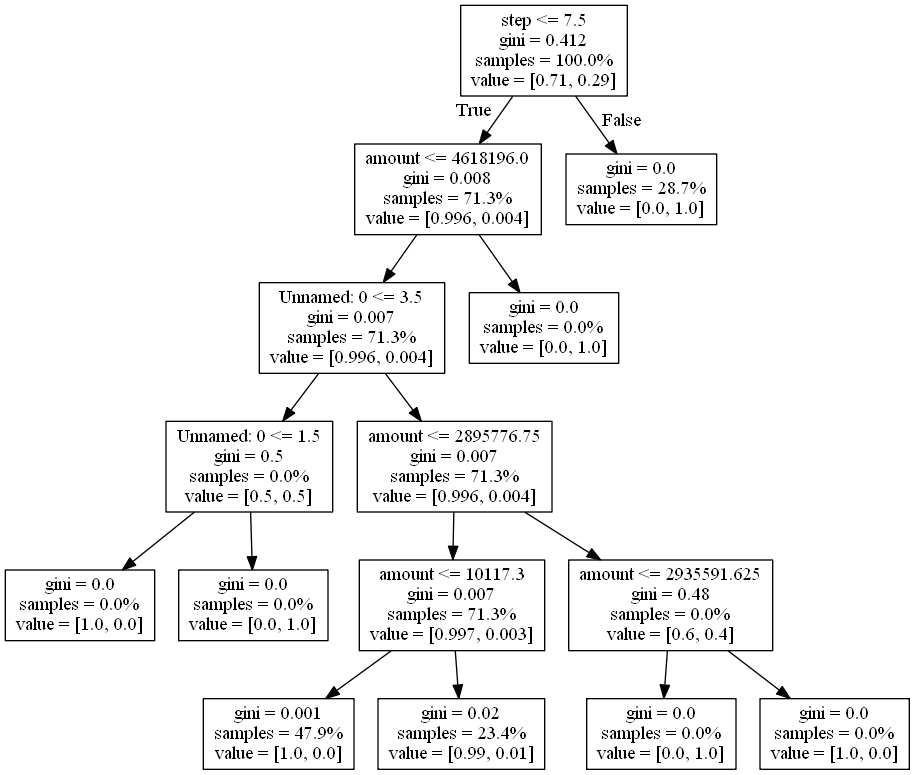

In [11]:
import pydotplus
#Creating the tree visualization

data = tree.export_graphviz(dt, out_file=None, feature_names= feature_names.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 

# Show graph
Image(graph.create_png())

## - The random forests classifer

### - Implementing the random forest classifier in scikit-learn

In [14]:
# dropping the index

df = df.drop(["Unnamed: 0"],axis=1)

In [15]:
# Creating the features

features = df.drop("isFraud",axis = 1).values

In [16]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42,stratify=target)

In [17]:
#Initiliazing an Random Forest Classifier with the default parameters

rf_classifier = RandomForestClassifier(random_state = 50)


#Fitting the classifier on the training data

rf_classifier.fit(X_train,y_train)


#Extracting the scores

rf_classifier.score(X_test,y_test)

0.9977657572906867

### - Hyperparameter tuning for random forest algorithms

In [20]:
# Creating a grid of different hyperparameters


grid_params = {
    'n_estimators': [300,400,500],
    'max_depth': [1,2,3],
    'min_samples_leaf': [0.05, 0.1, 0.2]
}


#Building a 3 fold Cross-Validated GridSearchCV object


grid_object = GridSearchCV(estimator = rf_classifier, param_grid = grid_params,scoring = "accuracy",cv=3,n_jobs= -1)


#Fitting the grid to the training data

grid_object.fit(X_train,y_train)


#Extracting the best parameters

print(grid_object.best_params_)


#Extracting the best model

rf_best = grid_object.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 0.05, 'n_estimators': 400}


## The AdaBoost classifier

### - Implementing the AdaBoost classifier in scikit-learn

In [21]:
#Initialize a tree (Decision Tree with max depth = 1)

tree = DecisionTreeClassifier(max_depth=1,random_state = 42)

#Initialize an AdaBoost classifier with the tree as the base estimator

ada_boost = AdaBoostClassifier(base_estimator=tree,n_estimators=100)

#Fitting the AdaBoost classifier to the training set

ada_boost.fit(X_train,y_train)

#Extracting the accuracy scores from the classifier

ada_boost.score(X_test,y_test)

0.9978833490122295

### - Hyperparameter tuning for the AdaBoost classifier

In [22]:
#Creating a grid of hyperparameters

grid_params = {"n_estimators":[100,200,300]}

#Building a 3 fold CV GridSearchCV object

grid_object = GridSearchCV(estimator = ada_boost, param_grid= grid_params,scoring = "accuracy",cv=3,n_jobs=-1)

#Fitting the grid to the training data

grid_object.fit(X_train,y_train)

#Extracting the best parameters

grid_object.best_params_

{'n_estimators': 100}

In [23]:
# Extracting the best model

ada_best = grid_object.best_estimator_

## Regression trees

In [24]:
# Building the decision tree regressor

dt_reg = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 0.2, random_state= 50)

#Fitting the tree to the training data

dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.2, random_state=50)

## The Random Forest Regressor

In [29]:
#Building the random forest regressor

#Initiliazing an Random forest Regressor with default parameters


rf_reg = RandomForestRegressor(max_depth = 10, min_samples_leaf=0.2,random_state = 50)

#Fitting the regressor on the training data

rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=0.2, random_state=50)

## The gradient boosted tree

### Implementing the gardient boosted tree in scikit-learn

In [30]:
#Building the gradient boosted regressor

#Initializing an Gradient Boosted Regressor with default parameters


gd_reg = GradientBoostingRegressor(max_depth = 5, n_estimators = 100, learning_rate=0.1,random_state = 50)


#Fitting the regressor on the training data

gd_reg.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, random_state=50)

## Ensemble classifier

### Implementing the voting classifier in scikit-learn

In [31]:
#Initializing the DT classifier

dt = DecisionTreeClassifier(criterion = "gini", random_state = 50)

#Fitting on the training data

dt.fit(X_train,y_train)


#Initializing an Random Forest Classifier with default parameters

rf_classifier = RandomForestClassifier(random_state = 50)


#Fitting the classifier on the training data

rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [32]:
#Creating a list of models

models = [("Decision Tree",dt),("Random Forest",rf_classifier)]

#Initialize a voting classifier

voting_model = VotingClassifier(estimators = models)


#Fitting the model to the training data

voting_model.fit(X_train,y_train)

#Evaluating the accuracy on the test data

voting_model.score(X_test,y_test)

0.9978833490122295